<a id='Title-Image-Classification'></a>
<h1 style="color:SlateGray;">Image Classification</h1>

**Input dataset**

MNIST: a set of 28x28 grayscale images of single, handwritten digits.

**Output classification**

Digit with the highest probability in the probability distribution of the 10 possible classes [0, 9].

<h2 style="color:SlateGray;">Background</h2>

**Layers**

<a id='Layers-Dense'></a>
*Dense*

Used for application of the associated activation function across all nodes, Dense layers tend to have "natural classification" properties.

Dense layers are implemented as linear maps (one-to-one and onto) and in practice will map from one linear space to a smaller or equal sized one.
		
**Activations**

<a id='Activations-relu'></a>
*relu*

The default activation function when a clear situationally-specific activation function doesn't present itself. Converges well in general use cases and is computationally inexpensive.
		
Implemented as the function $f(x) = max(x, 0)$, the source of its efficiency becomes self-evident retaining non-linearity, which is essential for learning complex features/concepts.
		
<a id='Activations-softmax'></a>
*softmax*

Used in multi-class classification to generate probabilities for each of the classes.
		
Normalizes the output vector such that the sum of its elements equals 1, thus, the output vector can be interpreted as a probability distribution.
		
**Optimizers**

<a id='Optimizers-rmsprop'></a>
*rmsprop*

Generally good optimization function with tunable learning rate parameters.
		
Behaves similarly to gradient descent with momentum by normalizing the learning rate by a weighted, running average of the magnitudes of recent gradients.
		
**Loss functions**

<a id='Loss-functions-categorical_crossentropy'></a>
*categorical_crossentropy*

Measures the predictive performance of multi-class classification models.
		
Implemented as the function $L = -\mathbf{y} \cdot log(\hat{ \mathbf{y} })$, when $\mathbf{y}$ is the input label vector and $\hat{ \mathbf{y} }$ is the model's output "prediction vector."

<h2 style="color:SlateGray;">Overview</h2>

Multi-class image classification model predicting the most likely digit contained in the image.

The model trains on 60,000 images through a 2-layer network and tests against 10,000 images. Images are converted from 28x28x1 $(l,w,d)$ arrays to 512x1x1 arrays

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
history = network.fit(train_images, train_labels,
            epochs=5,
            batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2549 - acc: 0.9261
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1034 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0674 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0495 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0369 - acc: 0.9890


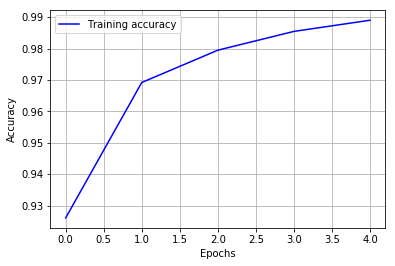

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

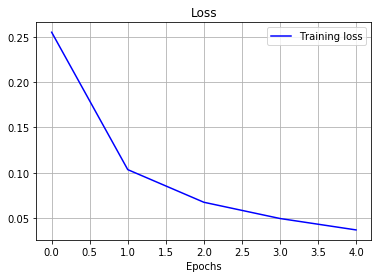

In [9]:
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 46us/step
test_acc: 0.978
